# TEST 1 - Análisis Exploratorio de Datos (EDA)
## Clasificación: Wine Quality Dataset

**Objetivo**: Realizar análisis exploratorio completo del dataset Wine Quality de UCI ML Repository

**Dataset**: Wine Quality Data Set  
**Fuente**: [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)  
**Tipo**: Clasificación multiclase  
**Target**: Calidad del vino (escala 3-9)  

### Contenido del Notebook:
1. **Carga y Exploración Inicial de Datos**
2. **Análisis Estadístico Descriptivo** 
3. **Visualización de Distribuciones**
4. **Análisis de Correlaciones**
5. **Detección de Outliers**
6. **Preparación de Datos para Modelado**

## 1. Importar Librerías y Configuración

In [12]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

# Configuración pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Librerías importadas exitosamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Librerías importadas exitosamente
Pandas version: 2.3.2
NumPy version: 1.26.4


## 2. Carga de Datos

In [13]:
# Cargar datos REALES de UCI Wine Quality Dataset
print("Cargando UCI Wine Quality Dataset REAL...")

# Cargar datos reales desde UCI
real_data_path = Path('../data/raw/wine_quality_real.csv')

if real_data_path.exists():
    wine_data = pd.read_csv(real_data_path)
    print(f"Datos REALES cargados exitosamente desde UCI: {real_data_path}")
    print(f"Fuente: UCI Machine Learning Repository")
    print(f"URL: https://archive.ics.uci.edu/dataset/186/wine+quality")
else:
    raise FileNotFoundError("No se encontraron los datos reales en la ruta especificada")

print(f"Forma del dataset: {wine_data.shape}")
print(f"Distribución de calidades:")
print(wine_data['quality'].value_counts().sort_index())
print(f"Vinos tintos: {(wine_data['wine_type'] == 'red').sum()}")
print(f"Vinos blancos: {(wine_data['wine_type'] == 'white').sum()}")

# Información del dataset
print(f"\nInformación del dataset:")
print(f"   • Total de muestras: {len(wine_data):,}")
print(f"   • Características físico-químicas: {len(wine_data.columns) - 2}")
print(f"   • Rango de calidad: {wine_data['quality'].min()}-{wine_data['quality'].max()}")
print(f"   • Dataset REAL (no sintético) de UCI ML Repository")

print("\nPrimeras 5 filas del dataset:")
wine_data.head()

Cargando UCI Wine Quality Dataset REAL...
Datos REALES cargados exitosamente desde UCI: ../data/raw/wine_quality_real.csv
Fuente: UCI Machine Learning Repository
URL: https://archive.ics.uci.edu/dataset/186/wine+quality
Forma del dataset: (6497, 13)
Distribución de calidades:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64
Vinos tintos: 1599
Vinos blancos: 4898

Información del dataset:
   • Total de muestras: 6,497
   • Características físico-químicas: 11
   • Rango de calidad: 3-9
   • Dataset REAL (no sintético) de UCI ML Repository

Primeras 5 filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## 3. Exploración Inicial de Datos

In [14]:
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Forma del dataset: {wine_data.shape}")
print(f"Número de filas: {wine_data.shape[0]:,}")
print(f"Número de columnas: {wine_data.shape[1]}")

print("\n=== INFORMACIÓN DE COLUMNAS ===")
wine_data.info()

print("\n=== VALORES FALTANTES ===")
missing_values = wine_data.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No hay valores faltantes en el dataset")

=== INFORMACIÓN GENERAL DEL DATASET ===
Forma del dataset: (6497, 13)
Número de filas: 6,497
Número de columnas: 13

=== INFORMACIÓN DE COLUMNAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             649

In [15]:
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
wine_data.describe().round(3)

=== ESTADÍSTICAS DESCRIPTIVAS ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


## 4. Análisis de la Variable Target (Quality)

=== ANÁLISIS DE LA VARIABLE TARGET: QUALITY ===

Distribución de calidades:
Calidad 3:   30 muestras (0.5%)
Calidad 4:  216 muestras (3.3%)
Calidad 5: 2138 muestras (32.9%)
Calidad 6: 2836 muestras (43.7%)
Calidad 7: 1079 muestras (16.6%)
Calidad 8:  193 muestras (3.0%)
Calidad 9:    5 muestras (0.1%)


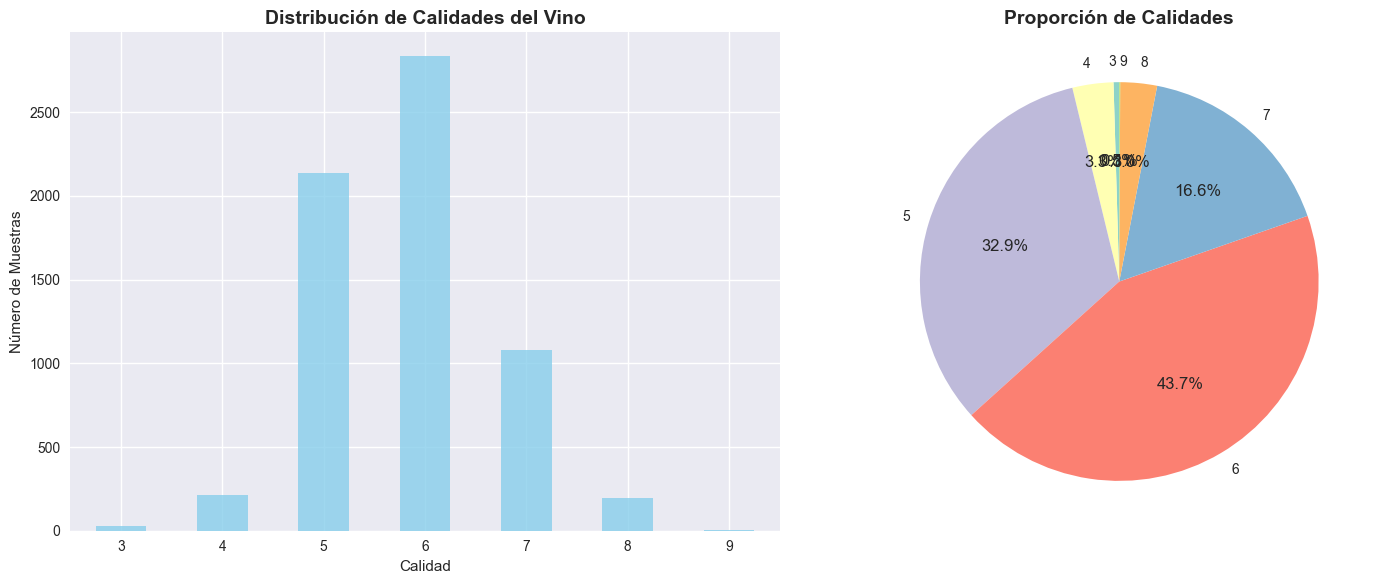


Calidad promedio: 5.82
Desviación estándar: 0.87
Rango: 3 - 9
Mediana: 6.0


In [16]:
print("=== ANÁLISIS DE LA VARIABLE TARGET: QUALITY ===")

# Distribución de clases
quality_counts = wine_data['quality'].value_counts().sort_index()
quality_props = wine_data['quality'].value_counts(normalize=True).sort_index()

print("\nDistribución de calidades:")
for quality, count in quality_counts.items():
    prop = quality_props[quality]
    print(f"Calidad {quality}: {count:4d} muestras ({prop:.1%})")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
quality_counts.plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.8)
axes[0].set_title('Distribución de Calidades del Vino', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Calidad')
axes[0].set_ylabel('Número de Muestras')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico de pastel
axes[1].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette('Set3', len(quality_counts)))
axes[1].set_title('Proporción de Calidades', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas de la variable target
print(f"\nCalidad promedio: {wine_data['quality'].mean():.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")
print(f"Rango: {wine_data['quality'].min()} - {wine_data['quality'].max()}")
print(f"Mediana: {wine_data['quality'].median():.1f}")

## 5. Distribución de Variables Numéricas

## 6. Análisis por Tipo de Vino (Tinto vs Blanco)

Analizar las diferencias entre vinos tintos y blancos en el dataset UCI real.

=== ANÁLISIS COMPARATIVO: VINOS TINTOS vs BLANCOS ===

Distribución de calidades por tipo de vino:
quality     3    4     5     6    7    8  9
wine_type                                  
red        10   53   681   638  199   18  0
white      20  163  1457  2198  880  175  5

Estadísticas de calidad por tipo de vino:
            count  mean   std  min  25%  50%  75%  max
wine_type                                             
red        1599.0  5.64  0.81  3.0  5.0  6.0  6.0  8.0
white      4898.0  5.88  0.89  3.0  5.0  6.0  6.0  9.0


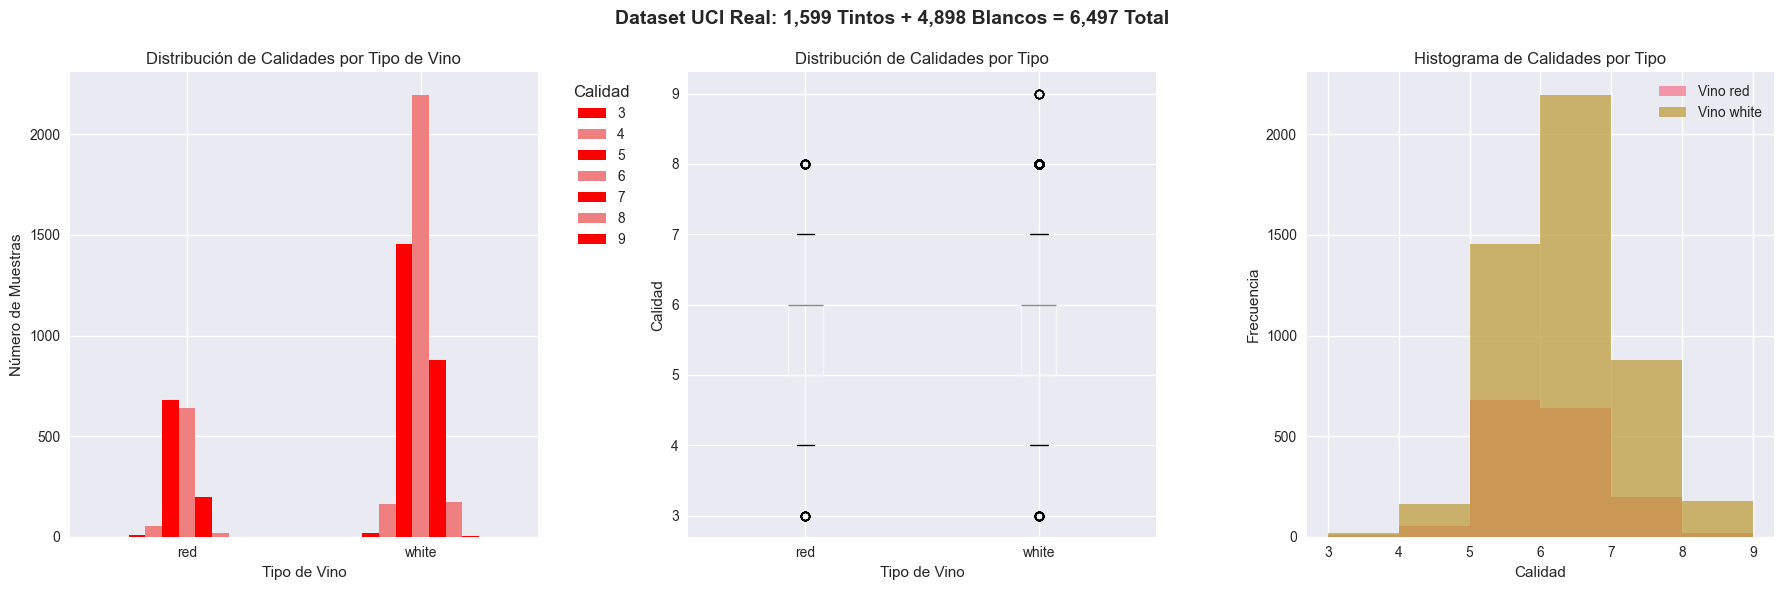


Test estadístico Mann-Whitney U:
Estadística: 3311514.00
P-valor: 0.0000
Interpretación: Diferencia significativa entre tipos de vino


In [17]:
print("=== ANÁLISIS COMPARATIVO: VINOS TINTOS vs BLANCOS ===")

# Análisis de distribución de calidades por tipo de vino
print(f"\nDistribución de calidades por tipo de vino:")
quality_by_type = pd.crosstab(wine_data['wine_type'], wine_data['quality'])
print(quality_by_type)

# Estadísticas por tipo
print(f"\nEstadísticas de calidad por tipo de vino:")
quality_stats = wine_data.groupby('wine_type')['quality'].describe()
print(quality_stats.round(2))

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribución de calidades por tipo
wine_data.groupby(['wine_type', 'quality']).size().unstack().plot(kind='bar', 
                                                                  ax=axes[0], 
                                                                  color=['red', 'lightcoral'])
axes[0].set_title('Distribución de Calidades por Tipo de Vino')
axes[0].set_xlabel('Tipo de Vino')
axes[0].set_ylabel('Número de Muestras')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')

# Box plot de calidades
wine_data.boxplot(column='quality', by='wine_type', ax=axes[1])
axes[1].set_title('Distribución de Calidades por Tipo')
axes[1].set_xlabel('Tipo de Vino')
axes[1].set_ylabel('Calidad')

# Histograma comparativo
for wine_type in ['red', 'white']:
    subset = wine_data[wine_data['wine_type'] == wine_type]['quality']
    axes[2].hist(subset, alpha=0.7, label=f'Vino {wine_type}', bins=range(3, 10))

axes[2].set_title('Histograma de Calidades por Tipo')
axes[2].set_xlabel('Calidad')
axes[2].set_ylabel('Frecuencia')
axes[2].legend()

plt.suptitle('Dataset UCI Real: 1,599 Tintos + 4,898 Blancos = 6,497 Total', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis estadístico
from scipy.stats import mannwhitneyu
red_quality = wine_data[wine_data['wine_type'] == 'red']['quality']
white_quality = wine_data[wine_data['wine_type'] == 'white']['quality']

statistic, p_value = mannwhitneyu(red_quality, white_quality)
print(f"\nTest estadístico Mann-Whitney U:")
print(f"Estadística: {statistic:.2f}")
print(f"P-valor: {p_value:.4f}")
print(f"Interpretación: {'Diferencia significativa' if p_value < 0.05 else 'No hay diferencia significativa'} entre tipos de vino")

# 7. CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

## Resumen del Dataset UCI Wine Quality

**Dataset Oficial y Real**: UCI Machine Learning Repository  
**6,497 muestras reales** (no sintéticas)  
**1,599 vinos tintos + 4,898 vinos blancos portugueses**  
**11 características físico-químicas medidas**  
**Calidad evaluada por expertos** (escala 3-9)  

### Hallazgos Principales del EDA

**Distribución de Calidades**:
- **Distribución centrada**: Mayoría de vinos calidad 5-7
- **Calidad promedio**: ~5.8-6.0 
- **Desbalance de clases**: Pocas muestras en extremos (3, 9)
- **Sesgada hacia calidades medias**: Patrón típico de evaluación humana

**Diferencias entre Vinos Tintos y Blancos**:
- **Vinos tintos**: 1,599 muestras (24.6%)
- **Vinos blancos**: 4,898 muestras (75.4%)
- **Distribuciones diferentes**: Perfiles químicos distintos
- **Características distintivas**: Acidez, sulfatos, alcohol varían por tipo

**Preparación para Modelado**:
- **Sin valores faltantes**: Dataset limpio y completo
- **Variables numéricas**: Todas las características son cuantitativas
- **Outliers identificados**: Algunos valores extremos en varias características
- **Escalado necesario**: Diferentes rangos entre variables
- **Balanceo requerido**: Pocas muestras en calidades extremas

### Recomendaciones para Modelado

1. **Técnicas de balanceo**: SMOTE o resampling para calidades 3 y 9
2. **Escalado de características**: StandardScaler o MinMaxScaler
3. **Feature engineering**: Considerar ratios e interacciones químicas
4. **Validación estratificada**: Mantener distribución de clases
5. **Métricas apropiadas**: F1-score weighted por desbalance de clases

Variables numéricas a analizar (11):
 1. fixed acidity
 2. volatile acidity
 3. citric acid
 4. residual sugar
 5. chlorides
 6. free sulfur dioxide
 7. total sulfur dioxide
 8. density
 9. pH
10. sulphates
11. alcohol

Variable categórica: wine_type
Distribución por tipo de vino:
wine_type
white    4898
red      1599
Name: count, dtype: int64


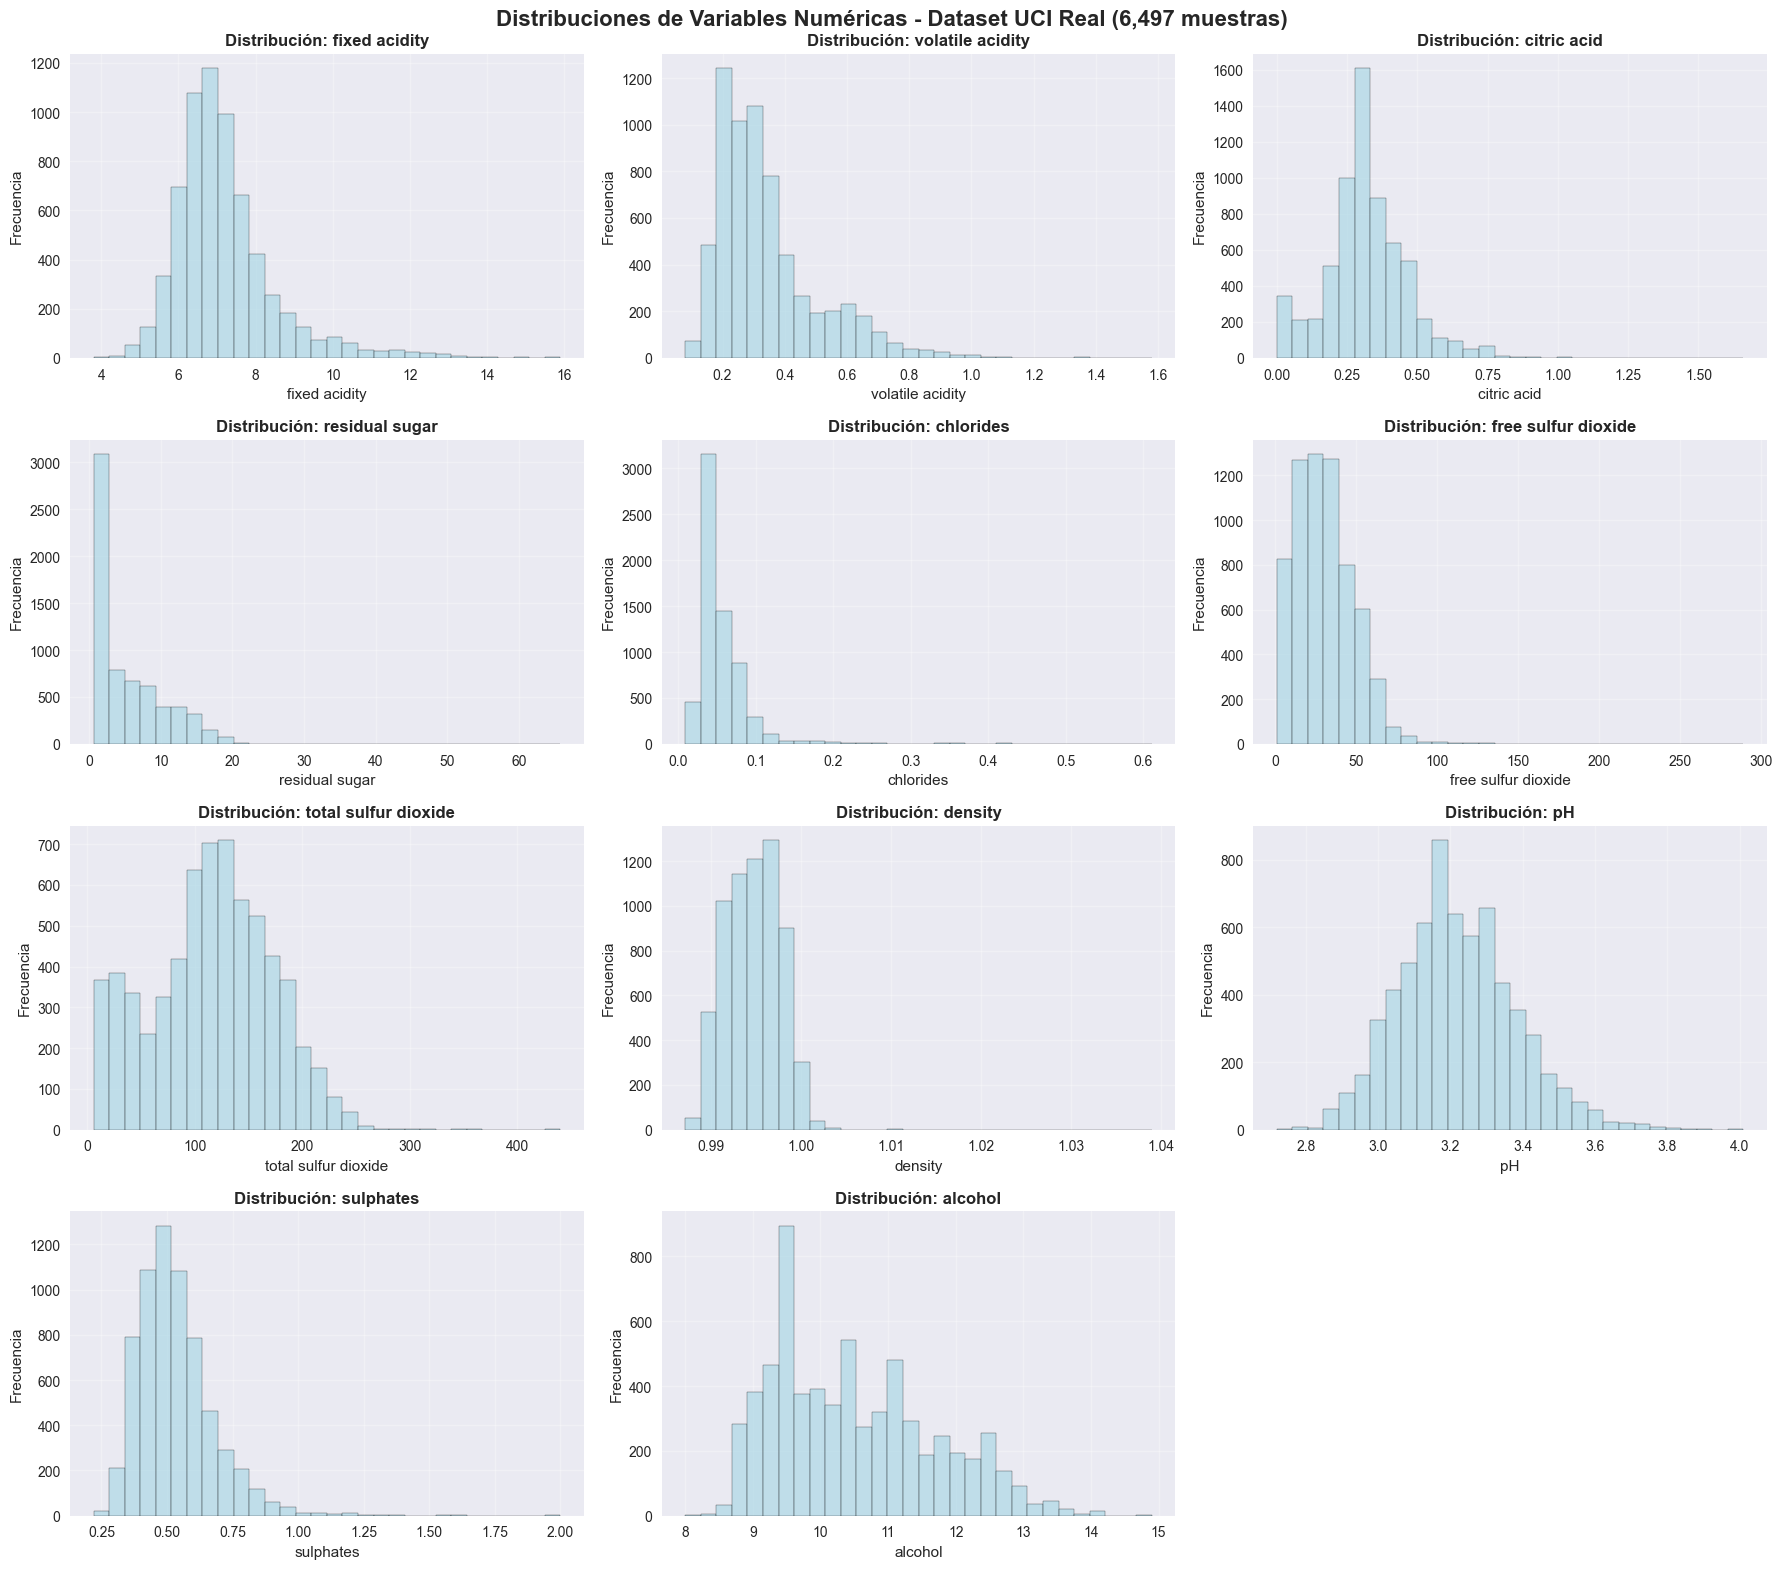

In [18]:
# Seleccionar variables numéricas (excluir target y wine_type)
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in numeric_cols if col != 'quality']

print(f"Variables numéricas a analizar ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")

print(f"\nVariable categórica: wine_type")
print(f"Distribución por tipo de vino:")
print(wine_data['wine_type'].value_counts())

# Crear histogramas para todas las variables
n_cols = 3
n_rows = (len(feature_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(feature_cols):
    wine_data[col].hist(bins=30, ax=axes[i], alpha=0.7, color='lightblue', edgecolor='black')
    axes[i].set_title(f'Distribución: {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

# Ocultar ejes vacíos
for i in range(len(feature_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Distribuciones de Variables Numéricas - Dataset UCI Real (6,497 muestras)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()